In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

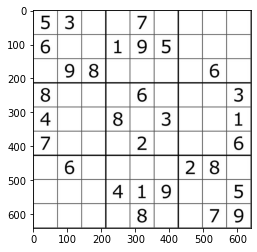

In [2]:
img = cv.imread('easy.jpg')
plt.imshow(img, cmap= 'gray')

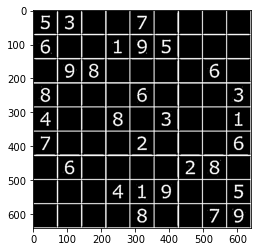

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.GaussianBlur(gray, (3, 3), cv.BORDER_DEFAULT)
# ret,thresh_inv = cv.threshold(gray, 150, 255,cv.THRESH_BINARY_INV)
# thresh_inv = cv.Canny(dst, 128, 255) # nhị phân hóa ảnh
# thresh_inv = cv.adaptiveThreshold(dst,255,1,1,11,2)
thresh_inv = cv.adaptiveThreshold(dst, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 1, 11, 2)
plt.imshow(thresh_inv, cmap= 'gray')

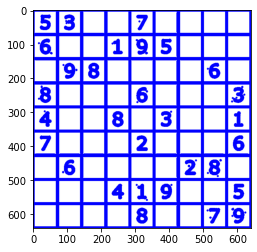

In [4]:
im = img.copy()
contours,hierarchy = cv.findContours(thresh_inv, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(im, contours, -1, (0, 0, 255), 5)
plt.imshow(im, cmap= 'gray')

In [5]:
def findBlockSudoku(contours):
    cnt = contours[0]
    max_area = cv.contourArea(cnt)
    for cont in contours:
        if cv.contourArea(cont) > max_area:
            cnt = cont
            max_area = cv.contourArea(cont)
            
    epsilon = 0.01 * cv.arcLength(cnt, True)
    poly_approx = cv.approxPolyDP(cnt, epsilon, True)
    
    return poly_approx

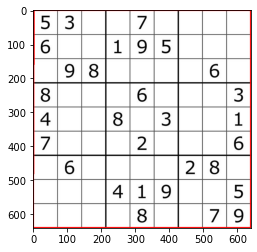

In [6]:
poly_approx = findBlockSudoku(contours)
t = img.copy()
cv.drawContours(t, [poly_approx], -1, (255, 0, 0), 4)
plt.imshow(t, cmap= 'gray')

In [7]:
def get_corner(pts):
    corner = np.zeros((4, 2), dtype = "float32")
    corner[0] = pts[0]
    corner[1] = pts[1]
    corner[2] = pts[2]
    corner[3] = pts[3]
    
#     corner[0] = pts[1]
#     corner[1] = pts[2]
#     corner[2] = pts[3]
#     corner[3] = pts[0]
    
    return corner

In [8]:
def transfrom_sudoku(image, pts):
    input_pts = get_corner(pts)
    (tl, bl, br, tr) = input_pts

    widthAD = int(np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2)))
    widthBC = int(np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2)))
    maxWidth = max(widthAD, widthBC)
    
    heightAB = int(np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2)))
    heightCD = int(np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2)))
    maxHeight = max(heightAB, heightCD)

    output_pts = np.array([
        [0, 0],
        [0, maxHeight - 1],
        [maxWidth - 1, maxHeight - 1],
        [maxWidth - 1, 0]], dtype = "float32")

    M = cv.getPerspectiveTransform(input_pts, output_pts)
    warped = cv.warpPerspective(image, M, (maxWidth, maxHeight), flags= cv.INTER_LINEAR)
    
    return warped

(875, 880)

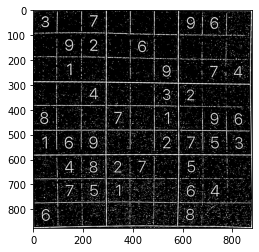

In [9]:
warped = transfrom_sudoku(thresh_inv, poly_approx)
plt.imshow(warped, cmap= 'gray')
warped.shape

In [10]:
def prediction(image):
    classes = new_model.predict_classes(image)
    
    if classes == [[0]]:
        return 0
    elif classes == [[1]]:
        return 1
    elif classes == [[2]]:
        return 2
    elif classes == [[3]]:
        return 3
    elif classes == [[4]]:
        return 4
    elif classes == [[5]]:
        return 5
    elif classes == [[6]]:
        return 6
    elif classes == [[7]]:
        return 7
    elif classes == [[8]]:
        return 8
    elif classes == [[9]]:
        return 9

In [11]:
from tensorflow.keras.models import load_model
new_model = load_model('keras_digit_model.h5')

In [12]:
# test_image = cv.imread('6.jpg',0)
# plt.imshow(test_image,cmap='gray')
# test_image.shape

In [13]:
# grayt.shape

In [14]:

# ret, thresh = cv.threshold(grayt.copy(), 75, 255, cv.THRESH_BINARY_INV)
# resized_digit = cv.resize(thresh, (28,28))
# resized_digit = resized_digit.reshape(1, 28, 28, 1)
# resized_digit = tf.cast(resized_digit, tf.float32)
# prediction = new_model.predict(resized_digit)
# print(prediction)

In [15]:
import tensorflow as tf
from PIL import Image

In [16]:
def getCellPositions(img_PT):
    img_PT = cv.resize(img,(3070,3070))
    cell_positions = []
    
    width = img_PT.shape[1]
    height = img_PT.shape[0]
    
    cell_width = width//9
    cell_height = height//9
    
    x1,x2,y1,y2 = 0,0,0,0
    
    for i in range(9):
        y2 = y1 + cell_height
        x1 = 0
        for j in range(9):
            x2 = x1 + cell_width
            current_cell = [x1 + 30, x2 - 30, y1 + 30, y2 - 30]
            cell_positions.append(current_cell)
            x1 = x2
        y1 = y2
    return cell_positions

In [34]:
pos = getCellPositions(warped)
pos

[[30, 311, 30, 311],
 [371, 652, 30, 311],
 [712, 993, 30, 311],
 [1053, 1334, 30, 311],
 [1394, 1675, 30, 311],
 [1735, 2016, 30, 311],
 [2076, 2357, 30, 311],
 [2417, 2698, 30, 311],
 [2758, 3039, 30, 311],
 [30, 311, 371, 652],
 [371, 652, 371, 652],
 [712, 993, 371, 652],
 [1053, 1334, 371, 652],
 [1394, 1675, 371, 652],
 [1735, 2016, 371, 652],
 [2076, 2357, 371, 652],
 [2417, 2698, 371, 652],
 [2758, 3039, 371, 652],
 [30, 311, 712, 993],
 [371, 652, 712, 993],
 [712, 993, 712, 993],
 [1053, 1334, 712, 993],
 [1394, 1675, 712, 993],
 [1735, 2016, 712, 993],
 [2076, 2357, 712, 993],
 [2417, 2698, 712, 993],
 [2758, 3039, 712, 993],
 [30, 311, 1053, 1334],
 [371, 652, 1053, 1334],
 [712, 993, 1053, 1334],
 [1053, 1334, 1053, 1334],
 [1394, 1675, 1053, 1334],
 [1735, 2016, 1053, 1334],
 [2076, 2357, 1053, 1334],
 [2417, 2698, 1053, 1334],
 [2758, 3039, 1053, 1334],
 [30, 311, 1394, 1675],
 [371, 652, 1394, 1675],
 [712, 993, 1394, 1675],
 [1053, 1334, 1394, 1675],
 [1394, 1675, 1394

In [18]:
# cv.imshow('Hoa Bi Ngan', cv.resize(warped.copy(),(15,3070)))
# cv.waitKey(0)
# cv.destroyAllWindows()

In [19]:
# plt.imshow(warped,cmap='gray')

In [35]:
samples = np.loadtxt('generalsamples.data',np.float32)
responses = np.loadtxt('generalresponses.data',np.float32)
responses = responses.reshape((responses.size,1))

model = cv.ml.KNearest_create()
model.train(samples, cv.ml.ROW_SAMPLE, responses)

True

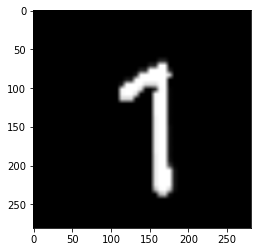

In [43]:
plt.imshow(cv.resize(warped.copy(),(3070,3070))[30: 311, 30: 311], cmap= 'gray')

4


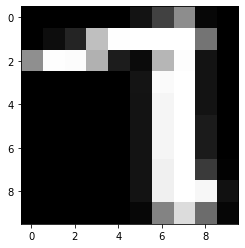

In [44]:
etes = cv.resize(warped.copy(),(3070,3070))[30: 311, 30: 311]
# grayt = cv.cvtColor(etes, cv.COLOR_BGR2GRAY)
# # dstt = cv.GaussianBlur(etes, (3, 3), cv.BORDER_DEFAULT)
b = etes.copy()
# c = cv.adaptiveThreshold(grayt, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 1, 11, 2)
# c = cv.Canny(etes, 128, 255)
# plt.imshow(c, cmap= 'gray')
con, hierarchy = cv.findContours(etes, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
len(con)
cv.drawContours(b, con, -1, (255, 0, 0), 1)
plt.imshow(b, cmap= 'gray')
# area_cnt = [cv.contourArea(cnt) for cnt in con]
# area_sort = np.argsort(area_cnt)[::-1]
# cnt = contours[area_sort[1]]
m = findBlockSudoku(con)
x,y,w,h = cv.boundingRect(m)
k = etes.copy()
cv.rectangle(k,(x,y),(x+w,y+h),(255,0,0),1)
plt.imshow(k, cmap= 'gray')
# # cv.drawContours(k, [x], -1, (255, 0, 0), 1)
# # plt.imshow(k, cmap= 'gray')
roismall = cv.resize(etes[y:y+h, x:x+w],(10,10))
plt.imshow(roismall, cmap= 'gray')
roismall = roismall.reshape((1,100))
roismall = np.float32(roismall)
retval, results, neigh_resp, dists = model.findNearest(roismall, k = 1)
print(str(int((results[0][0]))))


7

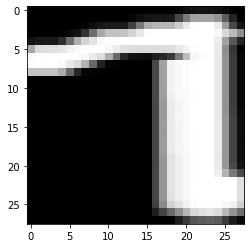

In [45]:
etesttt = cv.resize(etes[y:y+h, x:x+w], (28, 28))
# etesttt = cv.cvtColor(etesttt, cv.COLOR_BGR2GRAY)
etesttt = cv.adaptiveThreshold(etesttt, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 1, 11, 2)
plt.imshow(cv.resize(etes[y:y+h, x+10:x+w-10], (28, 28)), cmap= 'gray')
# cont,hierarchy = cv.findContours(etesttt,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
# q = cv.resize(etes[y:y+h, x:x+w], (28, 28)).copy()
# cv.drawContours(q, cont, -1, (255, 0, 0), 1)
# plt.imshow(q, cmap= 'gray')
resized_digittt= etesttt.reshape(1, 28, 28, 1)
resized_digittt = tf.cast(resized_digittt, tf.float32)
prediction(resized_digittt)

In [41]:
def predictDigit(cell,img):
    img = cv.resize(img,(3070,3070))
    img = img[cell[2] : cell[3], cell[0] : cell[1]]
    contours,hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        m = findBlockSudoku(contours)
        x,y,w,h = cv.boundingRect(m)
        if w * h >= 13000:
            roismall = cv.resize(img[y:y+h, x:x+w],(10,10))
            roismall = roismall.reshape((1,100))
            roismall = np.float32(roismall)
            retval, results, neigh_resp, dists = model.findNearest(roismall, k = 1)
            return int((results[0][0]))
        else:
            return 0
    else:
        return 0

In [26]:
def extractSudokuDigits(img_PT):
    #we start looking at the middle of the cell as this is where the sudoku digit should be at
    cell_digits,num = [],0
    cells = getCellPositions(img_PT)
    for cell in range(len(cells)):
        num = predictDigit(cells[cell],img_PT)
        cell_digits.append(num)
    n = 9
    cell_digits = [cell_digits[i:i+n] for i in range(0, len(cell_digits), n)] 
    return cell_digits

In [52]:
#testing the extraction process for one sudoku picture
a = extractSudokuDigits(warped)
a

[[7, 1, 7, 7, 0, 7, 7, 7, 7],
 [1, 4, 7, 7, 0, 0, 1, 0, 7],
 [0, 7, 4, 1, 5, 0, 4, 0, 1],
 [1, 1, 1, 3, 1, 1, 1, 1, 1],
 [1, 1, 1, 7, 0, 7, 2, 1, 1],
 [4, 0, 0, 0, 0, 4, 1, 0, 0],
 [7, 0, 1, 7, 0, 0, 2, 0, 7],
 [4, 7, 4, 7, 7, 0, 6, 0, 7],
 [4, 4, 7, 1, 0, 0, 4, 0, 4]]

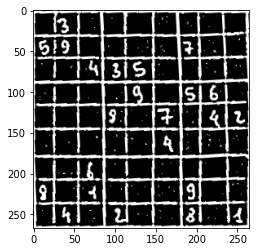

In [53]:
plt.imshow(warped,cmap='gray')